In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

sentiment_raw = pd.read_csv('amazon_cells_labelled.txt', delimiter= '\t', header=None)
sentiment_raw.columns = ['comment', 'sentiment']
sentiment_raw.head()

,comment,sentiment
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


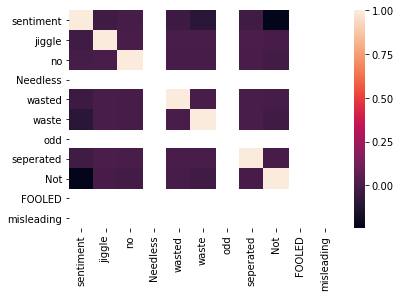

In [7]:
# Enumerate the keywords for negative sentiments.
keywords = ['jiggle', 'no', 'Needless', 'wasted', 'waste', 'odd', 'seperated', 'Not', 'FOOLED', 'misleading']

for key in keywords:
    sentiment_raw[str(key)] = sentiment_raw.comment.str.contains(
        ' ' + str(key) + ' ',
        case=False
)

sns.heatmap(sentiment_raw.corr())

In [8]:
sentiment_raw['sentiment'] = (sentiment_raw['sentiment'] == 0)
data = sentiment_raw[keywords]
target = sentiment_raw['sentiment']

from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
y_pred = bnb.fit(data, target).predict(data)

print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 413


It means that just 58.7% of comments are classified correctly, and our model performance does'nt look very good. It mightbe becase our variables are not totally indedependent.

In [4]:
# Use train_test_split to create the necessary training and test groups

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data, target).score(data, target)))

With 20% Holdout: 0.605
Testing on Sample: 0.587


It doesn't seem like our model is overfitting because the result of 20% Holdout is very close to original result. For seeing any probabile other issues we run a more robust evaluation technique with cross validation testing.

In [5]:
# Use cross_val_score to run Leave Out One test

cross_val_score(bnb, data, target, cv=10)

array([0.58, 0.62, 0.61, 0.56, 0.58, 0.53, 0.61, 0.57, 0.61, 0.56])

These results are also in the same range, and our model probably does not overfitting. Althoug this looks like what we expected, but the outcome can be significant based on the case.  